In [1]:
import os
from ultralytics import YOLO
import math
import cv2

# Load a model
#model = YOLO("yolov8n.pt")  # build a new model from scratch

# Use the model
#results = model.train(data="config.yaml", epochs=25)  # train the model

In [3]:
#model('D:/heisen/IITM studies/3rd year/sem 6/ID4900/data__/data/images/test/download.jpeg')
model_path = os.path.join('D:/heisen/IITM studies/3rd year/sem 6/ID4900/data__/', 'runs', 'detect', 'train', 'weights', 'last.pt')
img_path = 'D:/heisen/IITM studies/3rd year/sem 6/ID4900/data__/data/images/test/WIN_20240322_18_14_05_Pro.jpg'
model = YOLO(model_path)
results = model([img_path])  # return a list of Results objects



0: 384x640 1 pushrim, 1 castor, 154.8ms
Speed: 14.9ms preprocess, 154.8ms inference, 9.6ms postprocess per image at shape (1, 3, 384, 640)


In [4]:
push_rim_id = 0
pixel_count = 1600
fov = 68
for result in results:
    for box in result.boxes:
        if box.cls == push_rim_id:
            height = box.xyxy[0][3].item() - box.xyxy[0][1].item()
            width = box.xyxy[0][2].item() - box.xyxy[0][0].item()
            if width > height:
                width = height
            dist_pixel = 24*2.54/height
            half_len = dist_pixel*pixel_count/2
            dist = half_len/math.tan(math.radians(fov/2))
            alpha = math.degrees(math.acos(width/height))
            print("height:", height, "width:", width, "alpha:", alpha, "dist(m):", dist/100)
            
    result.show()  # display on screen

height: 649.962890625 width: 617.6953125 alpha: 18.12966741482542 dist(m): 1.1123947898456885


IMAGE TEST DETECT

In [ ]:
import os
import pandas as pd

# Define the test folder path
test_folder = 'D:/heisen/IITM studies/3rd year/sem 6/ID4900/data__/data/images/test'

# Create an empty list to store the scores
scores = []

# Iterate over the images in the test folder
for filename in os.listdir(test_folder):
    if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
        # Construct the image path
        img_path = os.path.join(test_folder, filename)

        # Run the model on the image
        results = model([img_path])

        # Process the results
        push_rim_id = 0
        pixel_count = 1600
        fov = 68
        for result in results:
            for box in result.boxes:
                if box.cls == push_rim_id:
                    height = box.xyxy[0][3].item() - box.xyxy[0][1].item()
                    width = box.xyxy[0][2].item() - box.xyxy[0][0].item()
                    if width > height:
                        width = height
                    dist_pixel = 24 * 2.54 / height
                    half_len = dist_pixel * pixel_count / 2
                    dist = half_len / math.tan(math.radians(fov / 2))
                    alpha = math.degrees(math.acos(width / height))
                    scores.append({'Image': filename, 'Height': height, 'Width': width, 'Alpha': alpha, 'Distance': dist / 100})

            result.show()
# Create a dataframe from the scores list
df_scores = pd.DataFrame(scores)

# Save the scores to a CSV file
df_scores.to_csv('scores.csv', index=False)



0: 640x640 1 pushrim, 3 castors, 120.2ms
Speed: 5.0ms preprocess, 120.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 2 pushrims, 71.3ms
Speed: 3.0ms preprocess, 71.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 pushrims, 2 castors, 53.8ms
Speed: 1.5ms preprocess, 53.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 pushrim, 1 castor, 50.0ms
Speed: 2.0ms preprocess, 50.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 pushrim, 2 castors, 53.1ms
Speed: 0.0ms preprocess, 53.1ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 pushrims, 1 castor, 50.6ms
Speed: 1.3ms preprocess, 50.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 pushrim, 1 castor, 50.1ms
Speed: 1.3ms preprocess, 50.1ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 pushrim, 1 castor, 57.5ms
Spe

### FOR IMAGES

In [16]:

# push_rim_id = 0
# pixel_count = 1600
# fov = 68
# for result in results:
#     for box in (result.boxes):
#          if(box.cls == 0):
           
#             center_x = box.xywh[0][0].item()
#             center_y = box.xywh[0][1].item()
#             width = box.xywh[0][2].item()
#             height = box.xywh[0][3].item()
            
#             if(width > height):
#                width = height
#             orientation = math.degrees(math.acos(width/height))

#             pixel_dist = 24*2.54/height
#             half_len = pixel_dist*pixel_count/2
#             dist = half_len/math.tan(math.radians(fov/2))

#             angle = math.degrees(math.atan((center_x - pixel_count/2)/pixel_count))
#             print("dist(m): ", dist, "angle(deg): ", angle)

# Read the image
push_rim_id = 0
fov = 68
image = cv2.imread(img_path)
pixel_count = image.shape[1]
print(pixel_count)


# Iterate over the results
for result in results:
    for box in result.boxes:
        if box.cls == push_rim_id:
            center_x = box.xywh[0][0].item()
            center_y = box.xywh[0][1].item()
            width = box.xywh[0][2].item()
            height = box.xywh[0][3].item()

            if width > height:
                width = height
            orientation = math.degrees(math.acos(width / height))

            pixel_dist = 24 * 2.54 / height
            half_len = pixel_dist * pixel_count / 2
            dist = half_len / math.tan(math.radians(fov / 2))

            angle = math.degrees(math.atan(pixel_dist*(center_x - pixel_count / 2) / dist))

            # Draw bounding box
            cv2.rectangle(image, (int(center_x - width / 2), int(center_y - height / 2)),
                          (int(center_x + width / 2), int(center_y + height / 2)), (0, 255, 0), 2)

            # Write distance and angle on top of the bounding box
            cv2.putText(image, f"dist(cm): {dist:.2f}, angle(deg): {angle:.2f}, orient(deg): {orientation:.2f}",
                        (int(center_x - width / 2), int(center_y - height / 2 - 10)),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

# Display the image
cv2.imshow("Image with Bounding Box", image)
cv2.imwrite("output_image.jpg", image)

cv2.waitKey(0)
cv2.destroyAllWindows()
            

1280


### FOR VIDEO

1280

0: 384x640 2 pushrims, 1 castor, 63.6ms
Speed: 0.0ms preprocess, 63.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 pushrims, 1 castor, 48.6ms
Speed: 0.9ms preprocess, 48.6ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 pushrims, 1 castor, 57.8ms
Speed: 0.0ms preprocess, 57.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 pushrims, 1 castor, 57.8ms
Speed: 0.0ms preprocess, 57.8ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 pushrims, 1 castor, 94.9ms
Speed: 0.0ms preprocess, 94.9ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 pushrims, 1 castor, 49.4ms
Speed: 0.0ms preprocess, 49.4ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 pushrims, 1 castor, 48.9ms
Speed: 0.0ms preprocess, 48.9ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 pushrims, 1 cas

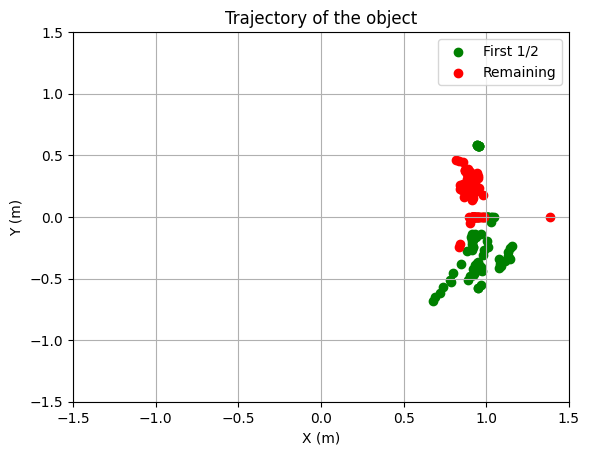

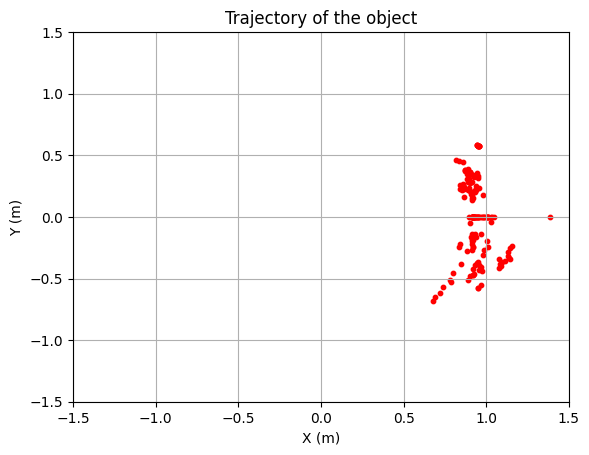

In [17]:
import matplotlib.pyplot as plt
import numpy as np
push_rim_id = 0
fov = 68
VIDEOS_DIR = os.path.join('.', 'videos')

video_path = os.path.join(VIDEOS_DIR, 'wheelchair6.mp4')
video_path_out = '{}_out.mp4'.format(video_path)

cap = cv2.VideoCapture(video_path)
ret, frame = cap.read()
H, W, _ = frame.shape
print(W)
out = cv2.VideoWriter(video_path_out, cv2.VideoWriter_fourcc(*'MP4V'), int(cap.get(cv2.CAP_PROP_FPS)), (W, H))
#int(cap.get(cv2.CAP_PROP_FPS))

model_path = os.path.join('.', 'runs', 'detect', 'train', 'weights', 'last.pt')

# Load a model
model = YOLO(model_path)  # load a custom model

threshold = 0.5
x_data = []
y_data = []
dist_arr = []
orient_arr = []
width_arr = []
width_arr_smooth = []
time_arr = []
temp = []
val = []
frame_no = 0
alpha = 0.9
target = 10 #number of frames to detect
while ret:

    results = model(frame)[0]
    
    for result in results.boxes.data.tolist():
        x1, y1, x2, y2, score, class_id = result
        average = 10
        if score > threshold:
            cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 4)
            # cv2.putText(frame, results.names[int(class_id)].upper(), (int(x1), int(y1 - 10)),
            #             cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0, 255, 0), 3, cv2.LINE_AA)
            if class_id == push_rim_id:
                center_x = (x2+x1)/2
                center_y = (y2+y1)/2
                width = (x2-x1)/2
                height = (y2-y1)/2

                if width > height:
                    width = height
                orientation = math.degrees(math.acos(width / height))

                pixel_dist = 24 * 2.54 / height
                half_len = pixel_dist * W / 4 #why coming double, temporary adjusted by dividing by 4, ideally shld be 2
                dist = half_len / math.tan(math.radians(fov / 2))

                angle = math.degrees(math.atan(pixel_dist*(center_x - W / 2) / dist))
                
                cv2.putText(frame, f"dist(cm): {dist:.2f}",
                        (int(center_x - width / 2), int(center_y - height / 2 - 10)),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 1, cv2.LINE_AA)
                cv2.putText(frame, f"angle(deg): {angle:.2f}",
                        (int(center_x - width / 2), int(center_y - height / 2 - 40)),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 1, cv2.LINE_AA)
                cv2.putText(frame, f"orient(deg): {orientation:.2f}",
                            (int(center_x - width / 2), int(center_y - height / 2 - 70)),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 1, cv2.LINE_AA)

                # Initialize empty lists for x and y coordinates
                dist_arr.append(dist)
                orient_arr.append(orientation)
                x_data.append(abs(dist)*math.cos(math.radians(orientation))/100)
                y_data.append(abs(dist)*math.sin(math.radians(orientation))/100)
                width_arr_smooth.append(alpha*average + (1-alpha)*width)
                width_arr.append(width)
                time_arr.append(frame_no)
                
                if(frame_no%target == target-1):    
                    delta = width_arr_smooth[frame_no] - width_arr_smooth[frame_no-target]
                    temp.append(frame_no)
                    val.append(delta)
                    if(delta > 0):
                        y_data[-target:] = [-value for value in y_data[-target:]]   
                        print("going closer")
                    else:
                        print("going away")
                        
                frame_no += 1

    out.write(frame)
    ret, frame = cap.read()

length = 10
import matplotlib.pyplot as plt

# Assuming x_data and y_data are already defined

# Calculate the indices for each section
n = len(x_data)
one_third = n // 2

# Scatter the first 1/3 in green
plt.scatter(x_data[:one_third], y_data[:one_third], color='green', label='First 1/2')

# Scatter the remaining in red
plt.scatter(x_data[one_third:], y_data[one_third:], color='red', label='Remaining')
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.grid()

plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.title('Trajectory of the object')
plt.legend()
plt.show()



plt.scatter(x_data, y_data, color='red', s=10)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.grid()

plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.title('Trajectory of the object')
plt.show()

cap.release()
out.release()
cv2.destroyAllWindows()
            

Text(0.5, 1.0, 'Convolutional Moving Average')

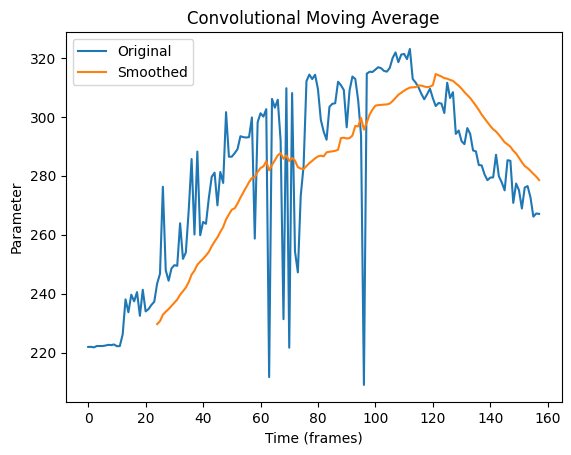

In [18]:
gap = 1
plt.plot(time_arr[::gap], width_arr[::gap])
# Define the window size for the moving average
window_size = 25

# Calculate the moving average
smoothed_y_data = np.convolve(width_arr,np.ones(window_size)/window_size, mode='valid')

# Plot the smoothed curve
plt.plot(time_arr[window_size-1::gap], smoothed_y_data[::gap])
plt.xlabel('Time (frames)')
plt.ylabel('Parameter')
plt.legend(['Original', 'Smoothed'])
plt.title('Convolutional Moving Average')


[0.0, 1.8578079223632784, 0.7228378295898423, 1.1272338867187557, 2.6639556884765625, 1.170095825195304, 1.1550094604492216, 0.45783843994141193, -0.517333984375, 0.6111907958984375, 0.5898223876953068, -1.157640075683588, -1.4187530517578182, -1.685777282714838, -0.11478881835937926]


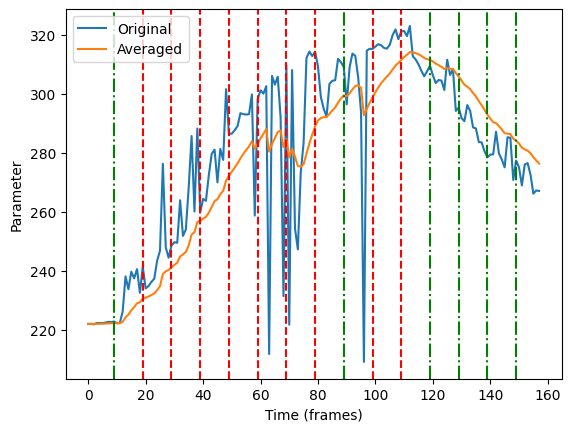

In [19]:
alpha = 0.9  # Polyak averaging parameter
averaged_width_arr = [width_arr[0]]  # Initialize the averaged list with the first value

for i in range(1, len(width_arr)):
    averaged_width = alpha * averaged_width_arr[i-1] + (1 - alpha) * width_arr[i]
    averaged_width_arr.append(averaged_width)

plt.plot(time_arr, width_arr)
plt.plot(time_arr, averaged_width_arr)
plt.xlabel('Time (frames)')
plt.ylabel('Parameter')
plt.legend(['Original', 'Averaged'])
for i in range(len(temp)):
    if(val[i] > 0):
        plt.axvline(x=temp[i], color='r', linestyle='--')
    else:
        plt.axvline(x=temp[i], color='g', linestyle='-.')
    

print(val)

DISTANCE SMOOTHED

[0.0, 1.8578079223632784, 0.7228378295898423, 1.1272338867187557, 2.6639556884765625, 1.170095825195304, 1.1550094604492216, 0.45783843994141193, -0.517333984375, 0.6111907958984375, 0.5898223876953068, -1.157640075683588, -1.4187530517578182, -1.685777282714838, -0.11478881835937926]


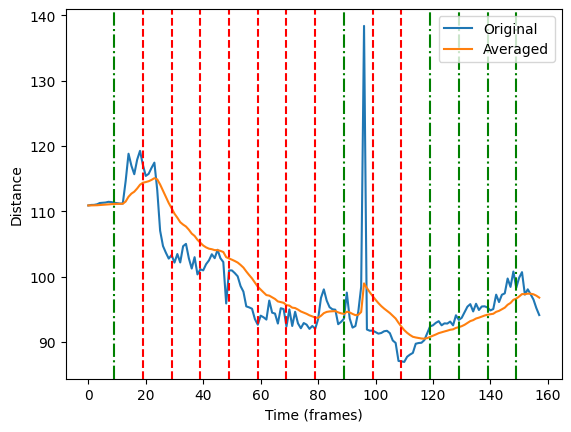

In [21]:
alpha = 0.9  # Polyak averaging parameter
averaged_dist_arr = [dist_arr[0]]  # Initialize the averaged list with the first value

for i in range(1, len(width_arr)):
    averaged_dist = alpha * averaged_dist_arr[i-1] + (1 - alpha) * dist_arr[i]
    averaged_dist_arr.append(averaged_dist)

plt.plot(time_arr, dist_arr)
plt.plot(time_arr, averaged_dist_arr)
plt.xlabel('Time (frames)')
plt.ylabel('Distance')
plt.legend(['Original', 'Averaged'])
for i in range(len(temp)):
    if(val[i] > 0):
        plt.axvline(x=temp[i], color='r', linestyle='--')
    else:
        plt.axvline(x=temp[i], color='g', linestyle='-.')
    

print(val)

In [ ]:
has_value_less_than_90 = any(value < 90 for value in dist_arr)
print(has_value_less_than_90)
print(orient_arr)


True
[31.691737835192374, 31.614307448997245, 31.67782155146299, 31.41713904960759, 31.25244759667888, 31.21200073322026, 31.11529076379726, 30.92127214562731, 30.98791193037411, 30.98999474906194, 31.292382974536384, 31.330873266107634, 29.605236527555064, 19.347832521960854, 16.2678009100841, 14.231966858714207, 18.299653534859736, 11.362659696498781, 16.553911692015895, 12.273176187997006, 20.980713947230807, 20.057622007944047, 17.74003218196591, 15.535480587487417, 17.669469445500457, 24.052689653710562, 0.0, 27.296768055700802, 29.737486285447147, 27.397753116097253, 28.140439219365867, 26.83064027976434, 21.213096264173554, 24.33134713864801, 22.750204822828255, 17.469879178359168, 0.0, 22.18106423875667, 0.0, 24.708091454081195, 22.673345299679646, 21.695100882414593, 15.115075533547945, 0.0, 2.19608066428034, 13.64286040226756, 0.0, 11.127875386545263, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.025491687447321, 14.776477889933293, 15.02097490150895, 9.698764789873133, 33.24485716140259, 

### FOR LIVE STREAM

In [ ]:
push_rim_id = 0
fov = 68

# Open the video capture device (USB attached camera)
cap = cv2.VideoCapture(1)

# Get the frame width and height
W = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
H = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Create a VideoWriter object to write the output frames
out = cv2.VideoWriter('live_stream_out.mp4', cv2.VideoWriter_fourcc(*'MP4V'), 30, (W, H))

model_path = './runs/detect/train/weights/last.pt'

# Load the YOLO model
model = YOLO(model_path)

threshold = 0.5

while True:
    # Read a frame from the video stream
    ret, frame = cap.read()

    if not ret:
        break

    # Detect objects in the frame using the YOLO model
    results = model(frame)[0]

    for result in results.boxes.data.tolist():
        x1, y1, x2, y2, score, class_id = result

        if score > threshold:
            cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 4)
            if class_id == push_rim_id:
                center_x = (x2 + x1) / 2
                center_y = (y2 + y1) / 2
                width = (x2 - x1) / 2
                height = (y2 - y1) / 2

                if width > height:
                    width = height
                orientation = math.degrees(math.acos(width / height))

                pixel_dist = 24 * 2.54 / height
                half_len = pixel_dist * W / 2
                dist = half_len / math.tan(math.radians(fov / 2))

                angle = math.degrees(math.atan(pixel_dist*(center_x - W / 2) / dist))

                cv2.putText(frame, f"dist(cm): {dist:.2f}",
                            (int(center_x - width / 2), int(center_y - height / 2 - 10)),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 3, cv2.LINE_AA)
                cv2.putText(frame, f"angle(deg): {angle:.2f}",
                            (int(center_x - width / 2), int(center_y - height / 2 - 40)),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 3, cv2.LINE_AA)
                cv2.putText(frame, f"orient(deg): {orientation:.2f}",
                            (int(center_x - width / 2), int(center_y - height / 2 - 70)),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 3, cv2.LINE_AA)

    # Write the frame to the output video
    out.write(frame)

    # Display the frame
    cv2.imshow('Live Stream', frame)

    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture and video writer objects
cap.release()
out.release()

# Destroy all windows
cv2.destroyAllWindows()


In [ ]:
# import os
# import cv2


# VIDEOS_DIR = os.path.join('.', 'videos')

# video_path = os.path.join(VIDEOS_DIR, 'wheelchair2.mp4')
# video_path_out = '{}_out.mp4'.format(video_path)

# cap = cv2.VideoCapture(video_path)
# ret, frame = cap.read()
# H, W, _ = frame.shape
# out = cv2.VideoWriter(video_path_out, cv2.VideoWriter_fourcc(*'MP4V'), int(cap.get(cv2.CAP_PROP_FPS)), (W, H))

# model_path = os.path.join('.', 'runs', 'detect', 'train', 'weights', 'last.pt')

# # Load a model
# model = YOLO(model_path)  # load a custom model

# threshold = 0.5

# while ret:

#     results = model(frame)[0]

#     for result in results.boxes.data.tolist():
#         x1, y1, x2, y2, score, class_id = result

#         if score > threshold:
#             cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 4)
#             cv2.putText(frame, results.names[int(class_id)].upper(), (int(x1), int(y1 - 10)),
#                         cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0, 255, 0), 3, cv2.LINE_AA)

#     out.write(frame)
#     ret, frame = cap.read()

# cap.release()
# out.release()
# cv2.destroyAllWindows()

In [ ]:
from matplotlib.animation import FuncAnimation
import random
import matplotlib.pyplot as plt
# Create a figure and axis

